# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Input

In [2]:
df=pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

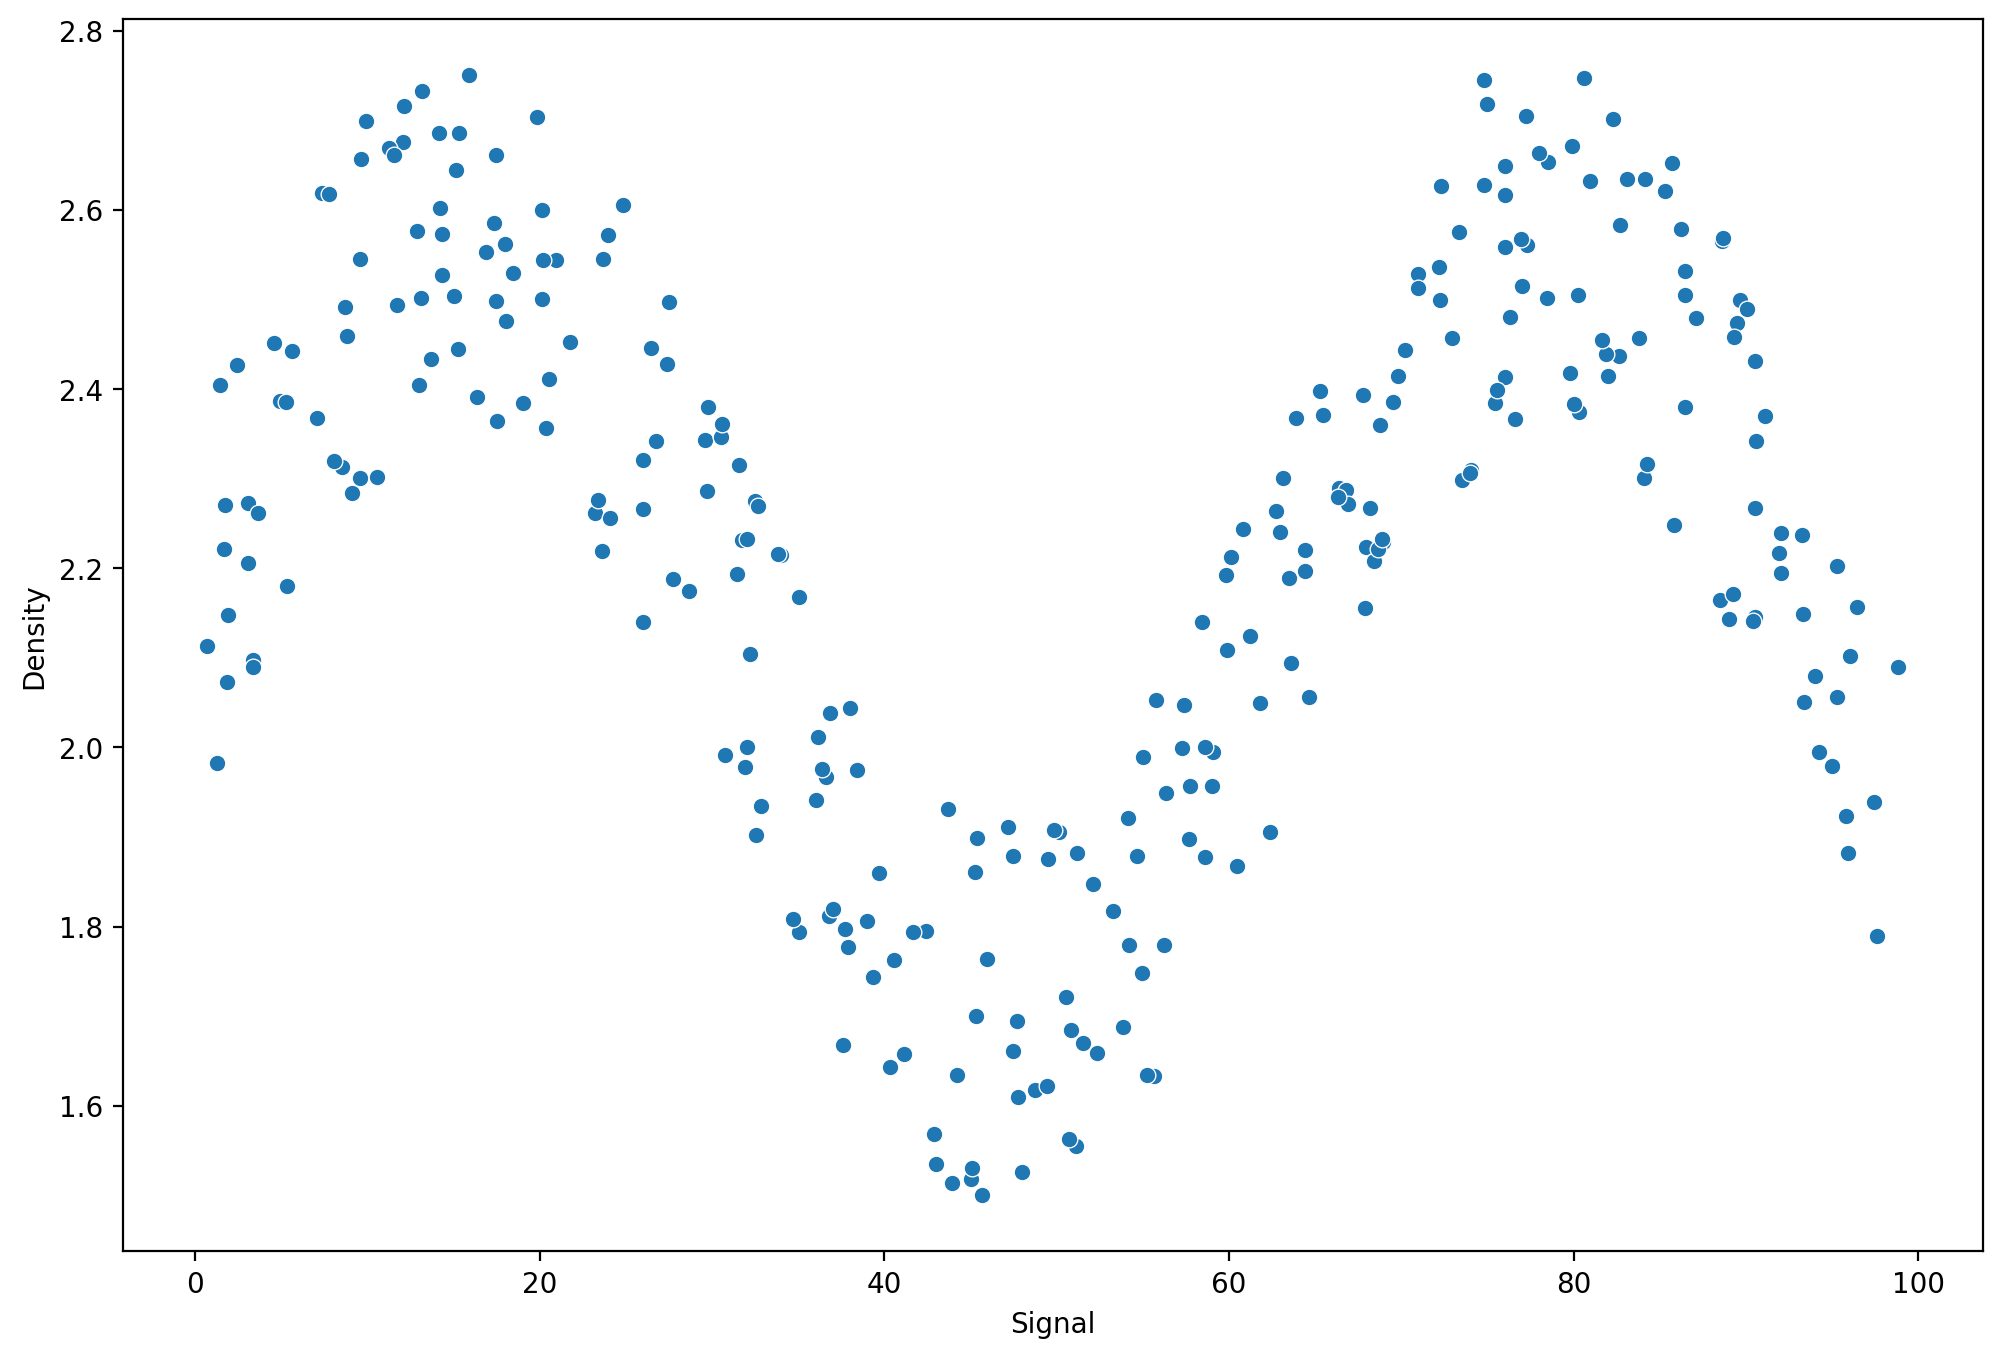

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

# Splitting the Data

In [6]:
X=df['Signal'].values.reshape(-1,1)
y=df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model=LinearRegression()

In [11]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_preds=lr_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [17]:
signal_range=np.arange(0,100)

In [18]:
lr_output=lr_model.predict(signal_range.reshape(-1,1))

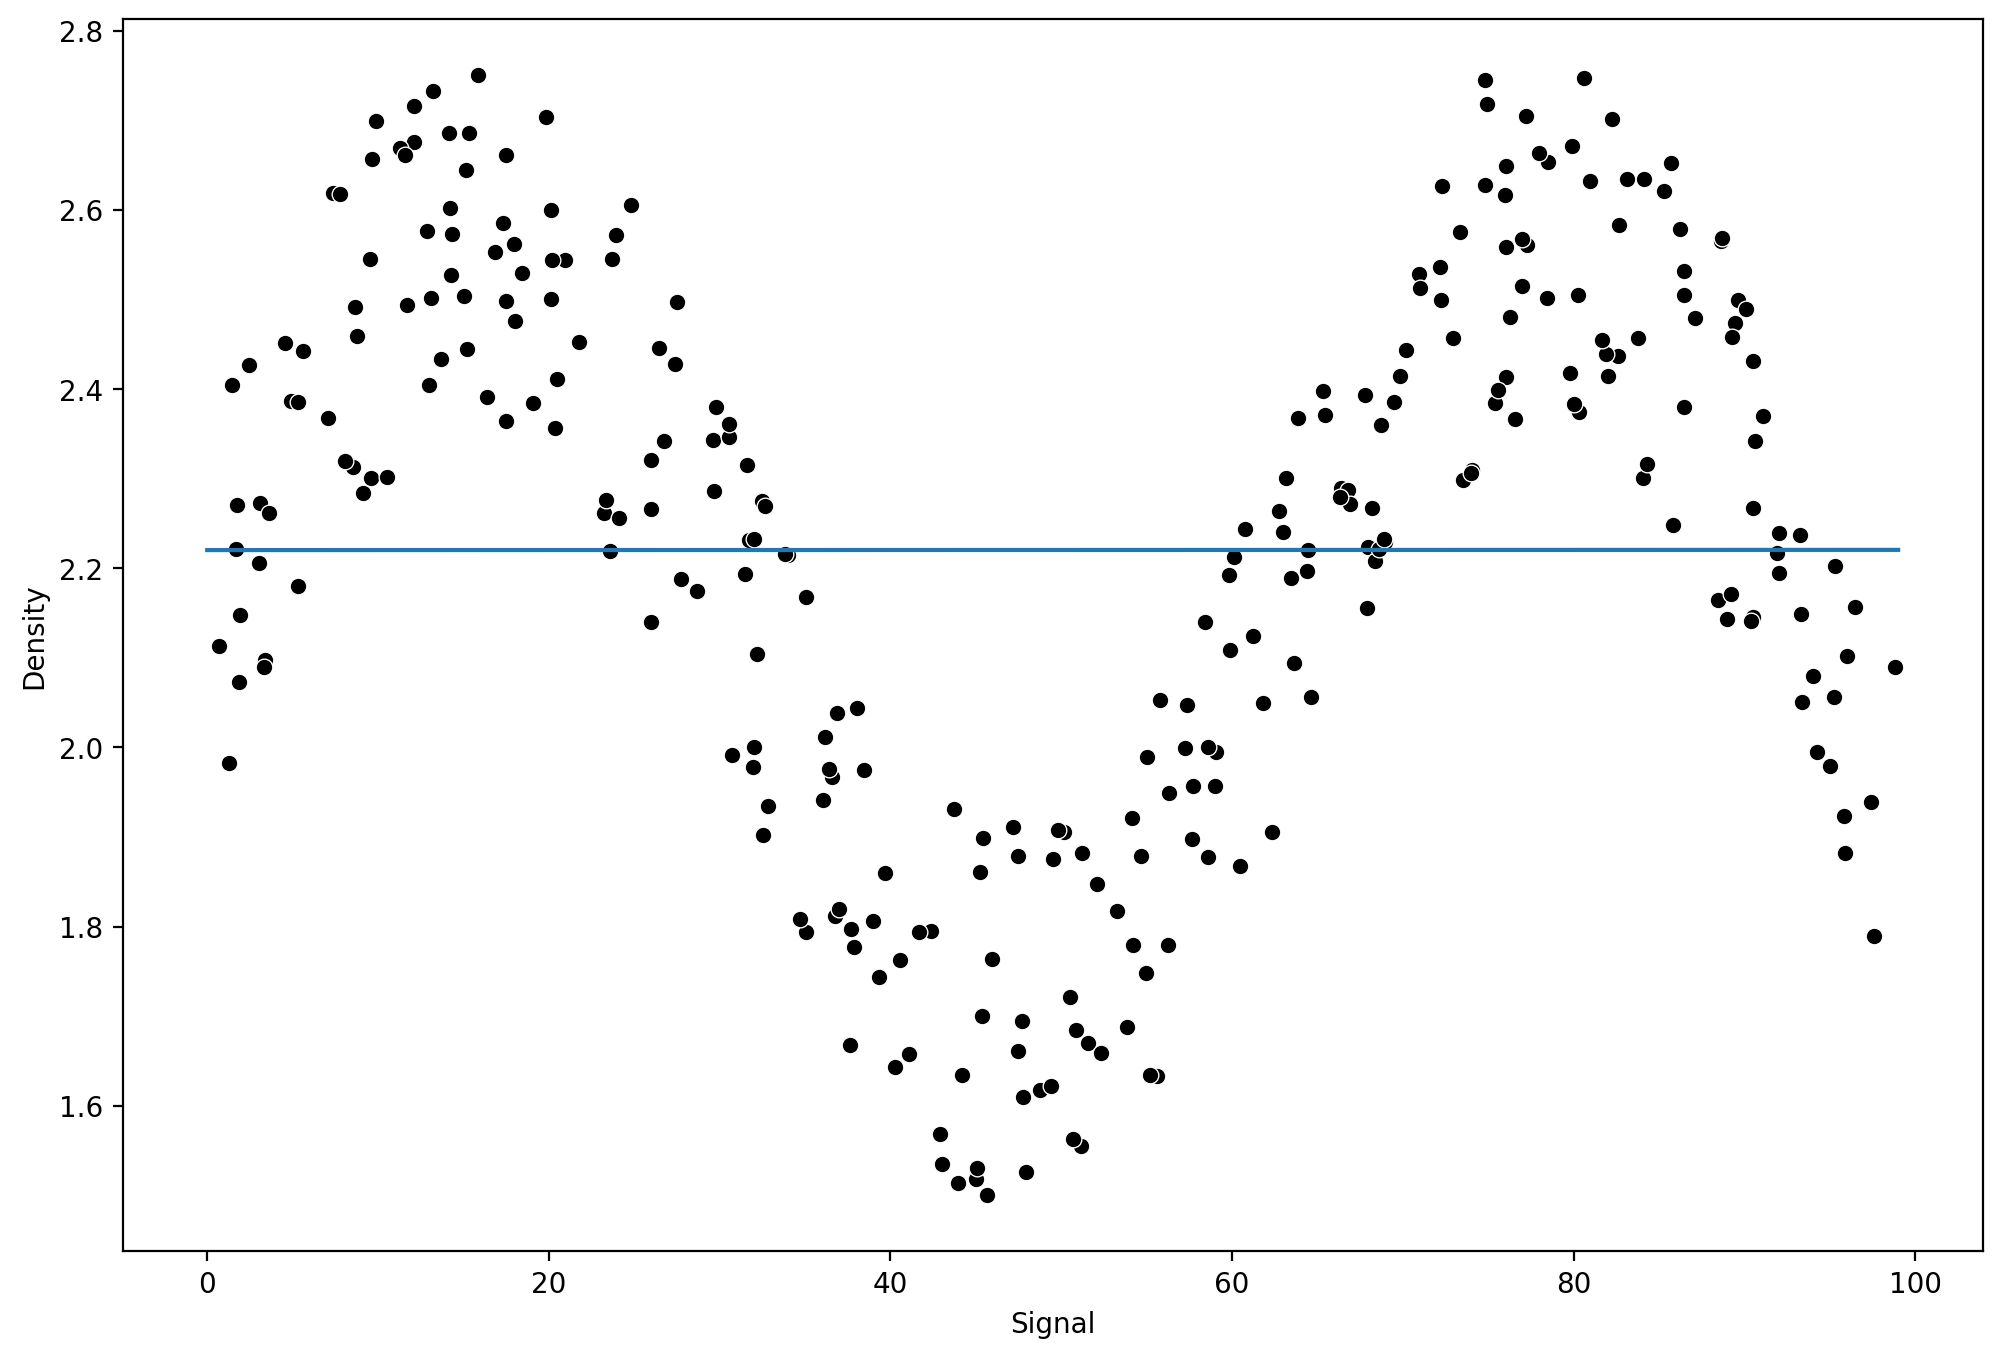

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

# Polynomial Regression

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [26]:
def run_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE:{rmse}')
    signal_range=np.arange(0,100)
    output=model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)
    

RMSE:0.2570051996584629


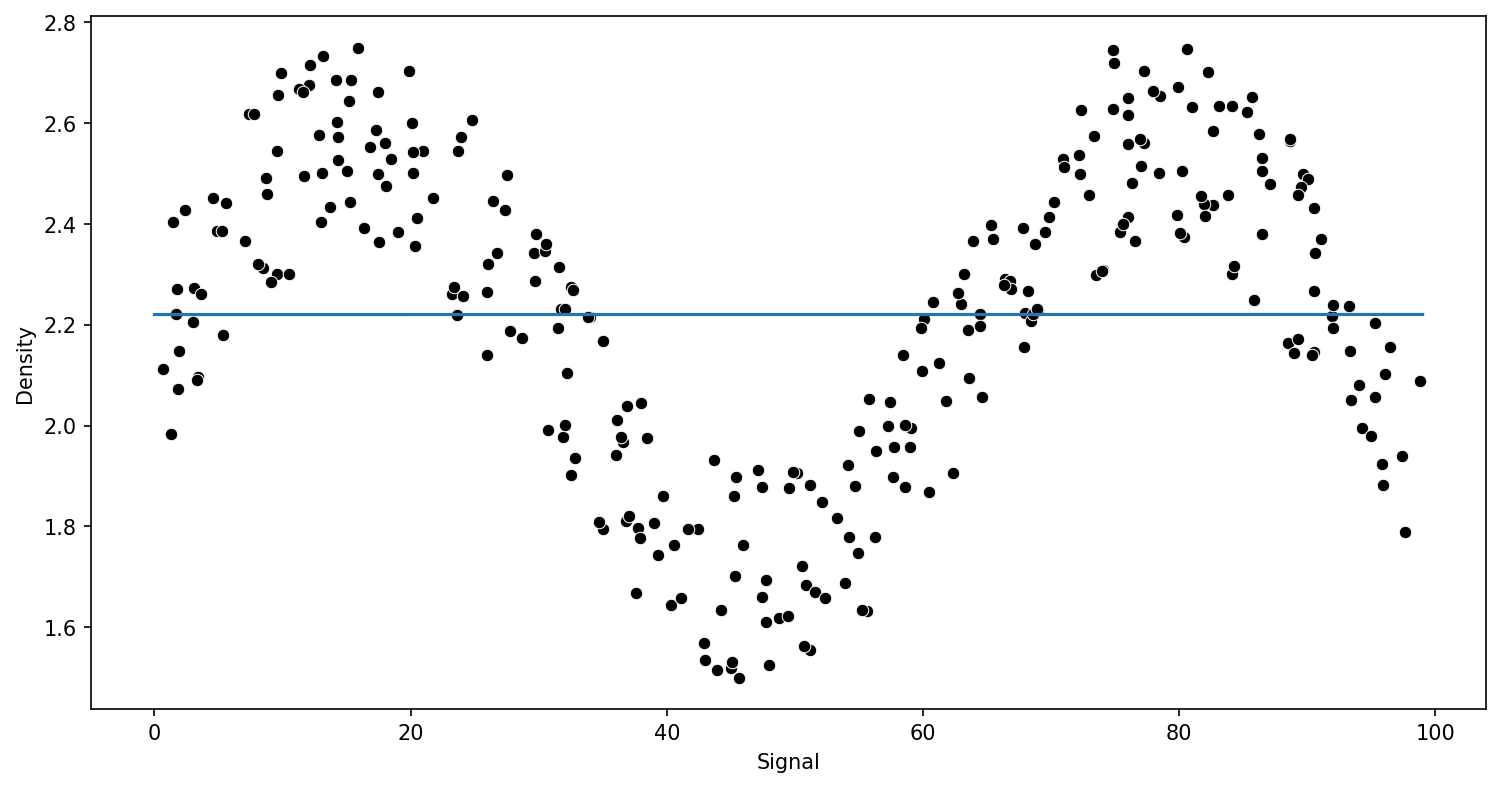

In [27]:
run_model(model,X_train,X_test,y_train,y_test)

# Pipeline for poly orders

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe=make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE:0.28173095637255463


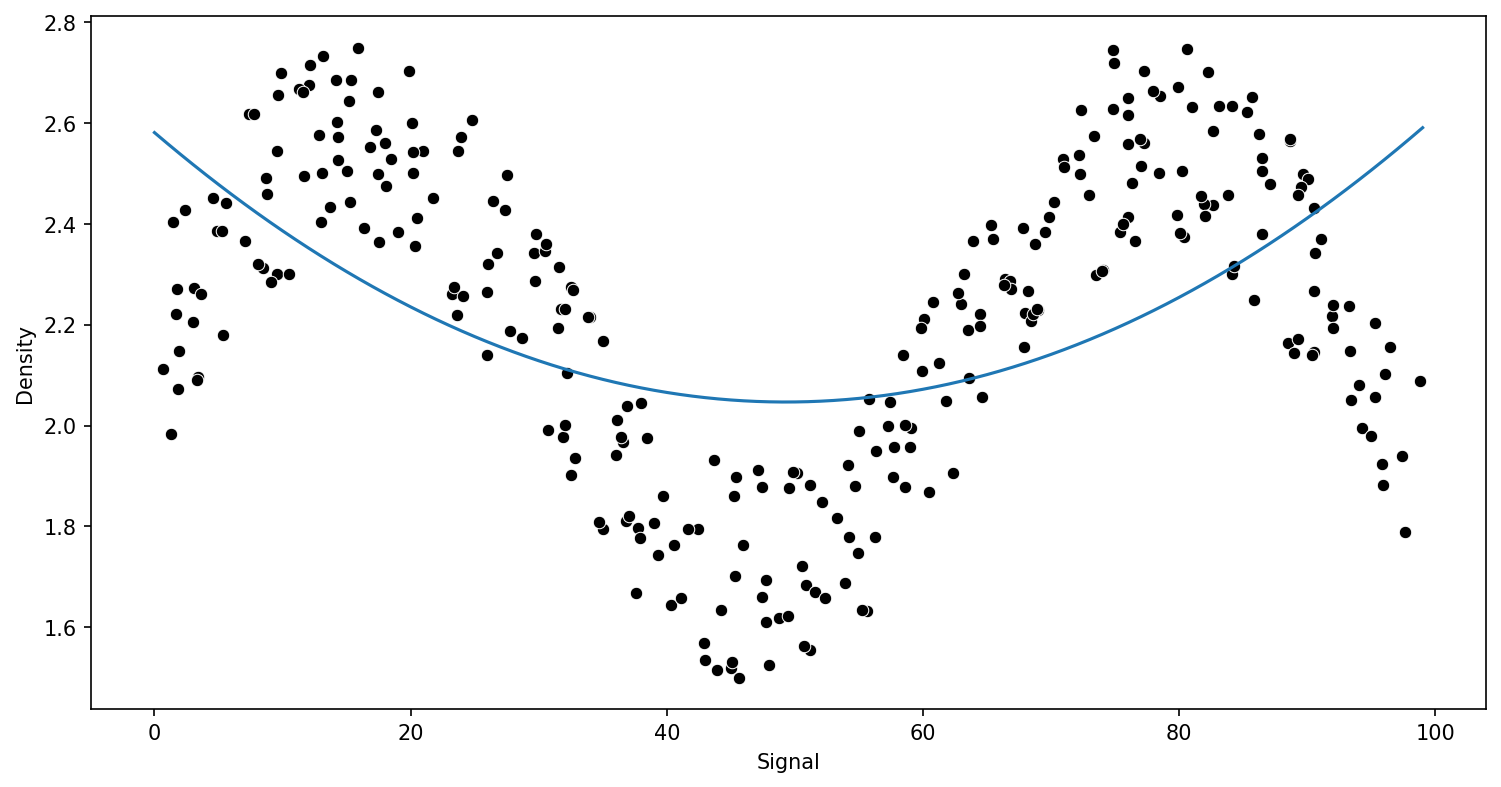

In [31]:
run_model(pipe,X_train,X_test,y_train,y_test)

# Comparing Various Polynomial Orders

RMSE:0.14034843686496898


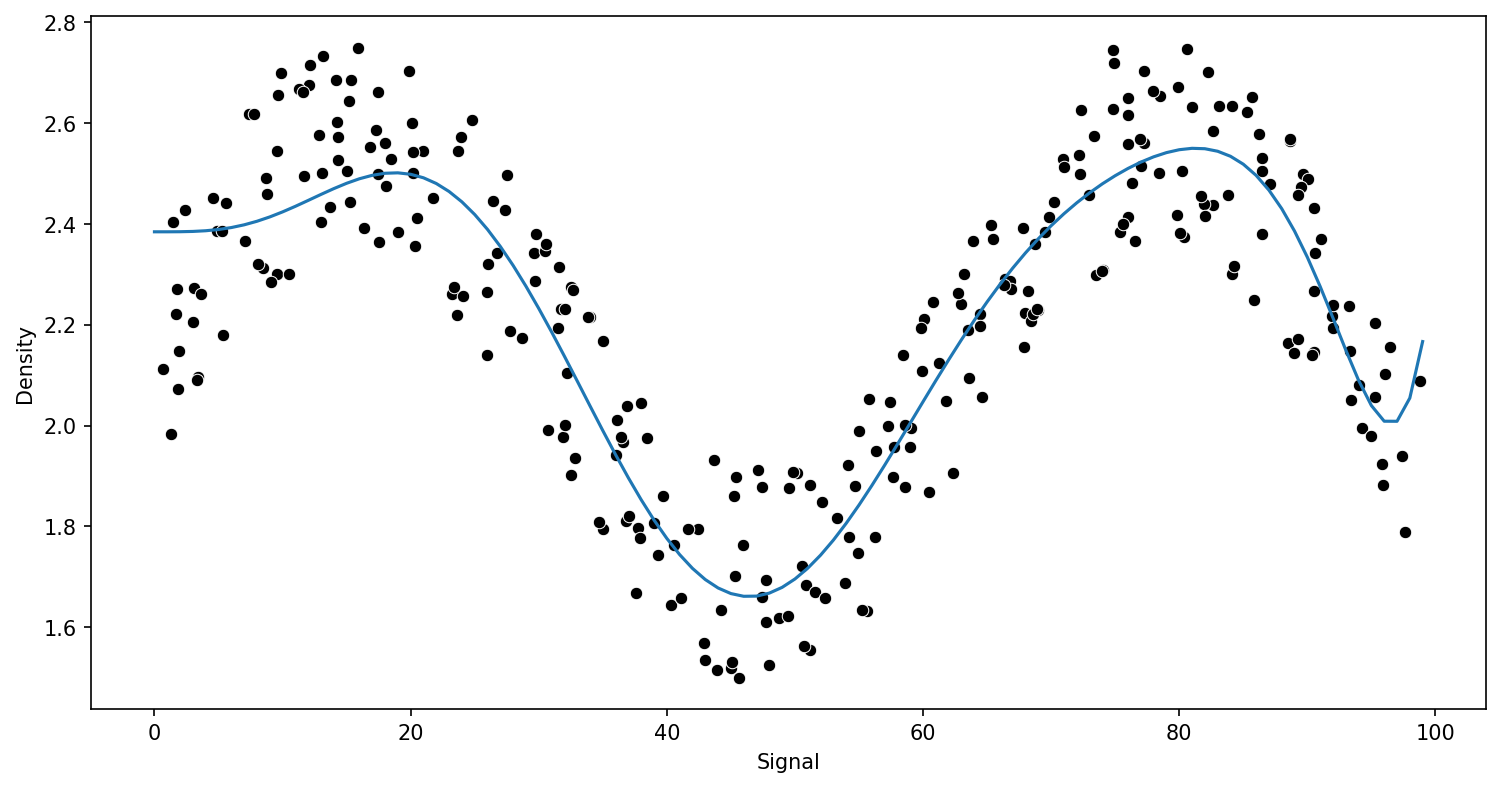

In [32]:
pipe=make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,X_test,y_train,y_test)

# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.1523487028635337
RMSE:0.13730685016923647
RMSE:0.13277855732740926


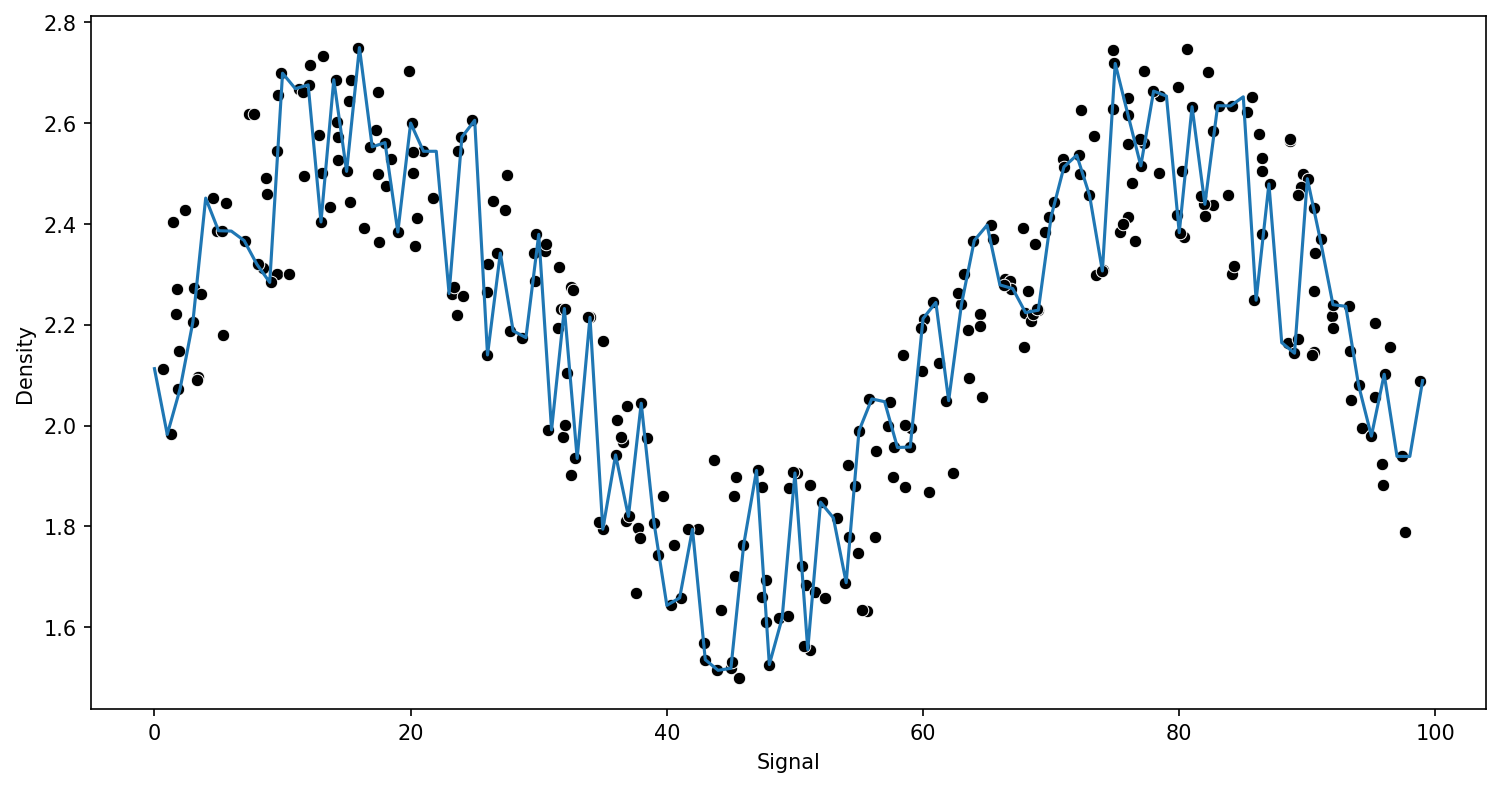

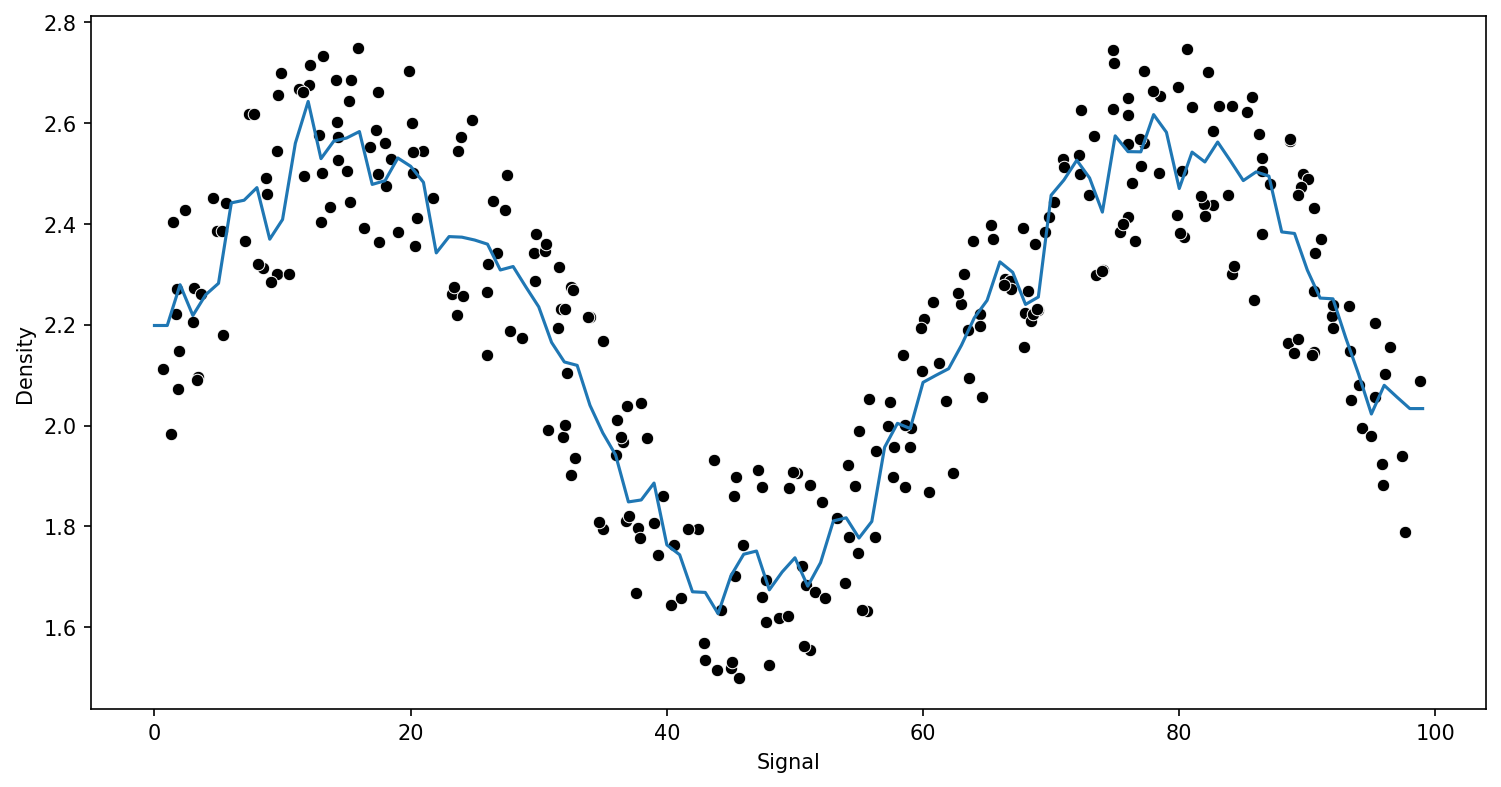

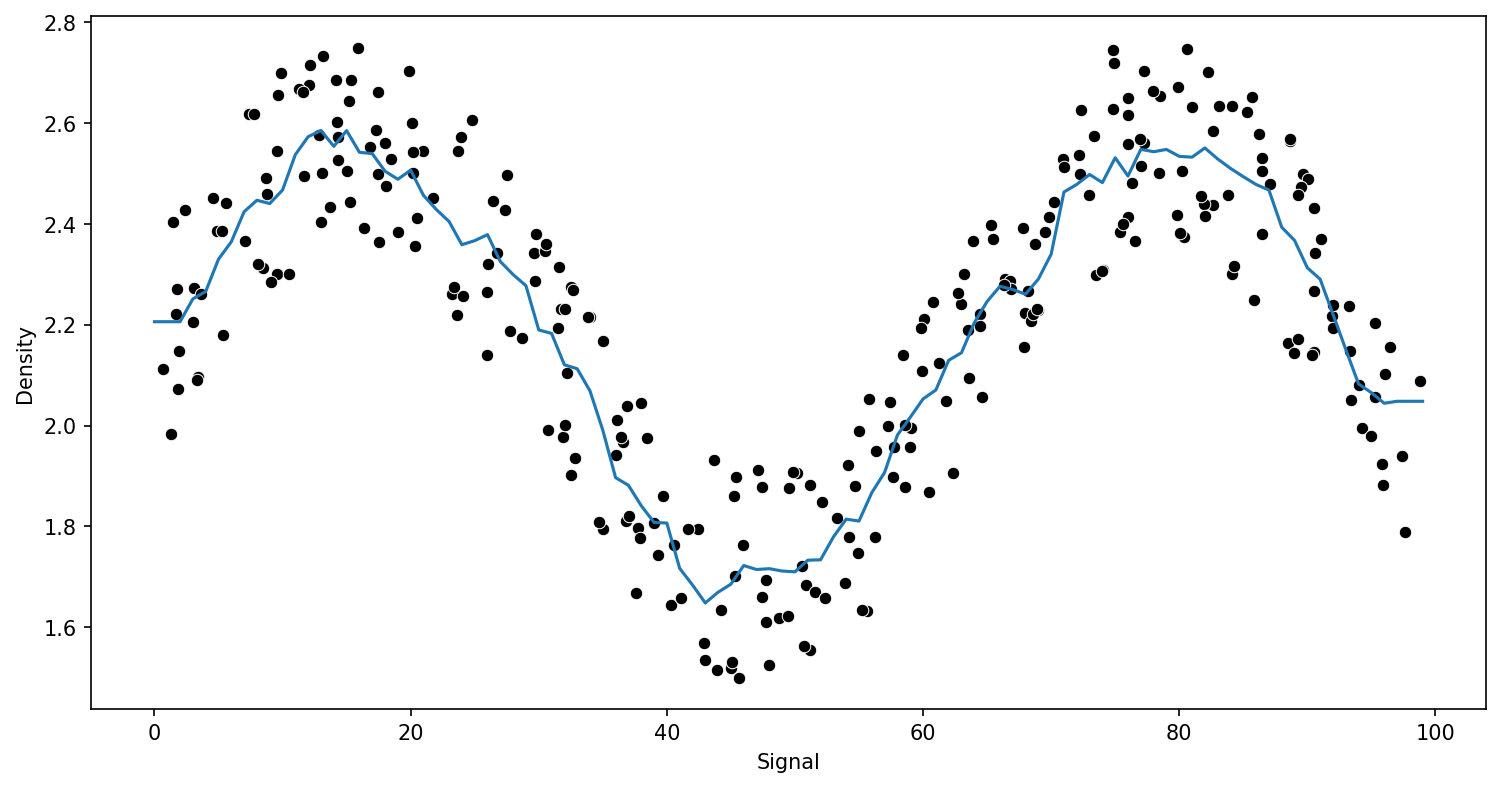

In [35]:
preds={}
k_values=[1,5,10]
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,X_test,y_train,y_test)

# Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

RMSE:0.1523487028635337


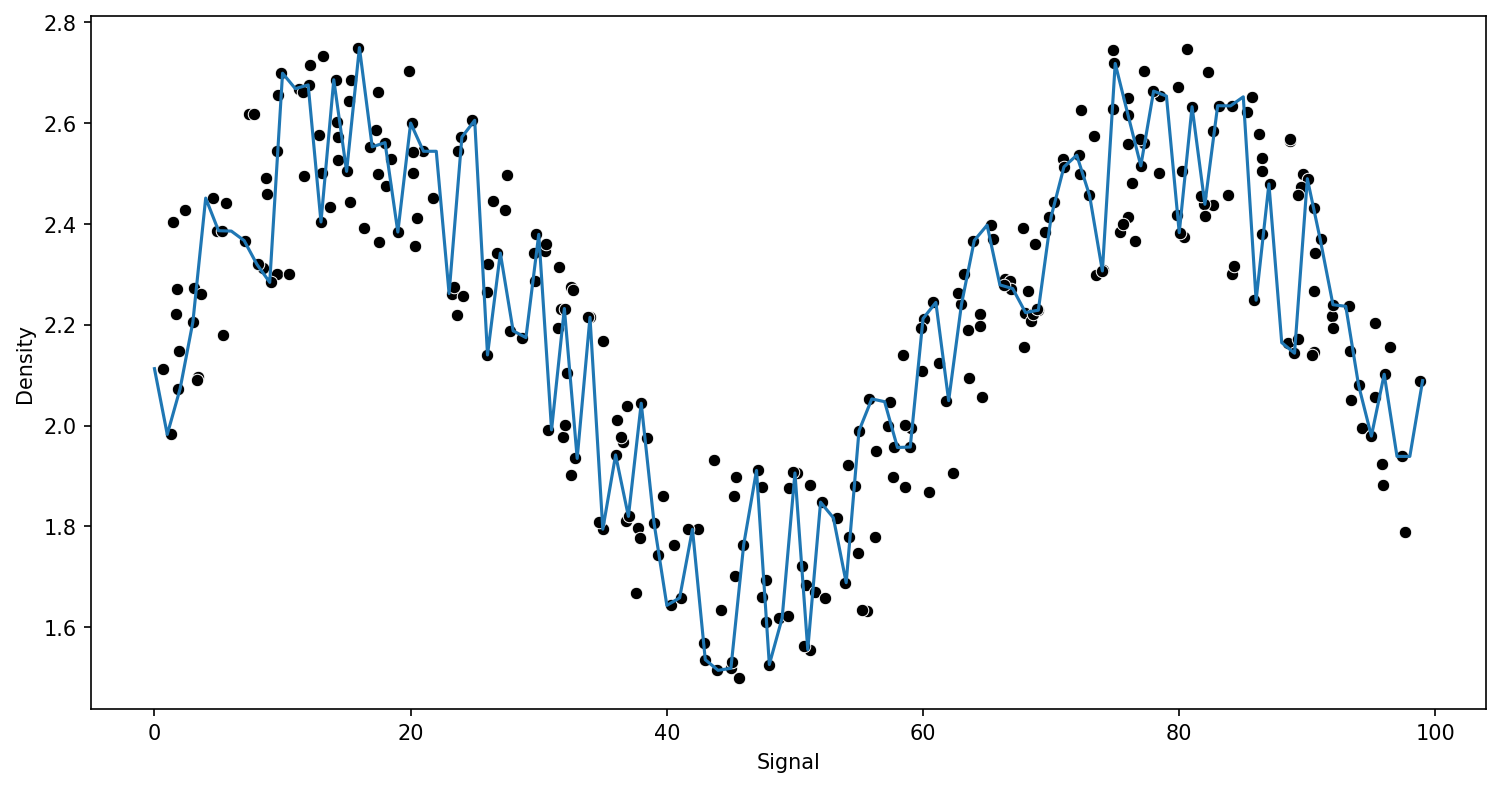

In [37]:
model=DecisionTreeRegressor()
run_model(model,X_train,X_test,y_train,y_test)

# Support Vector Regression

In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr=SVR()

In [42]:
grid=GridSearchCV(svr,param_grid)

RMSE:0.12646999302046696


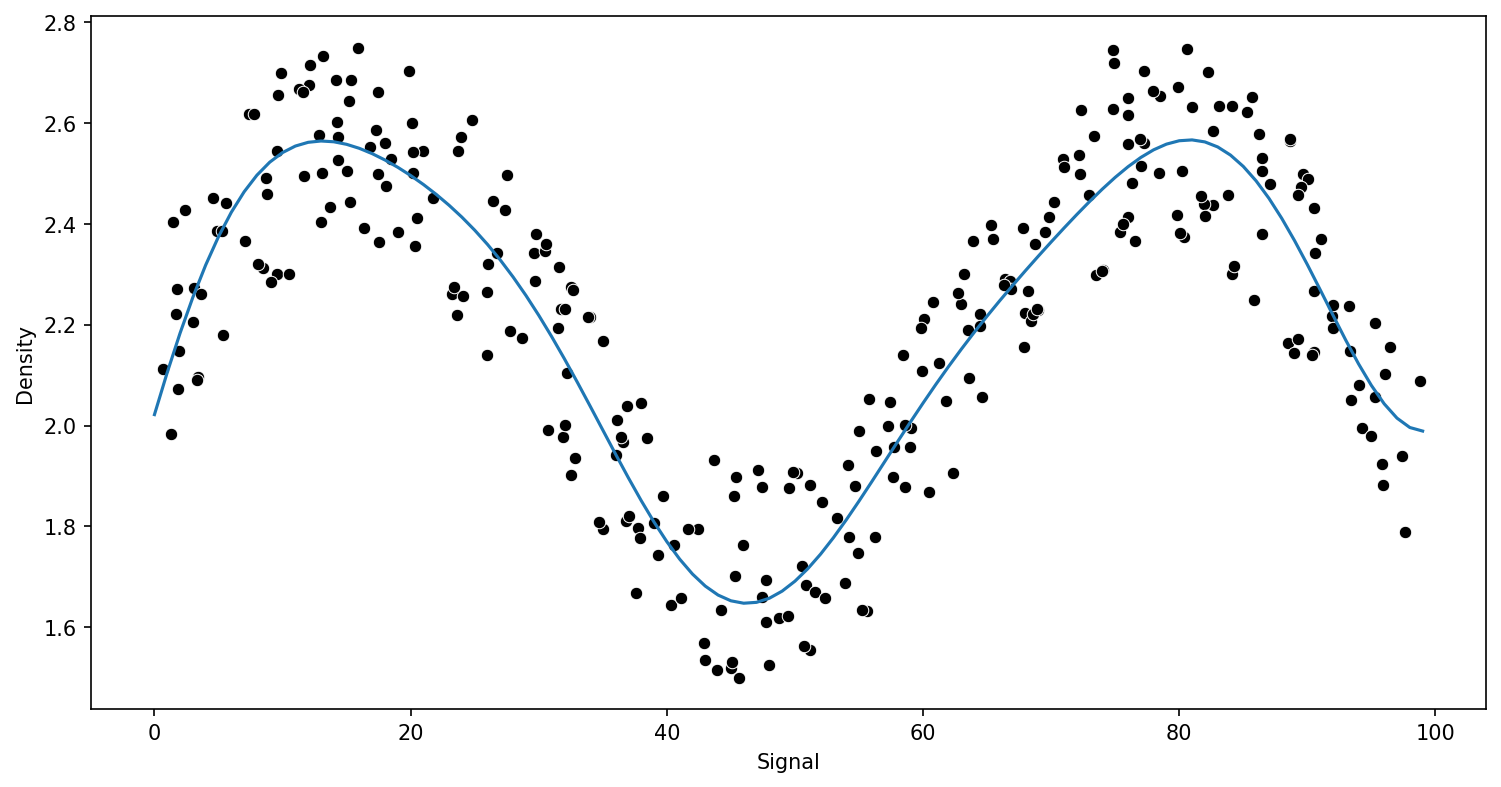

In [43]:
run_model(grid,X_train,X_test,y_train,y_test)

# Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

RMSE:0.14164048237207363
RMSE:0.13146444960721812
RMSE:0.1345273215301591


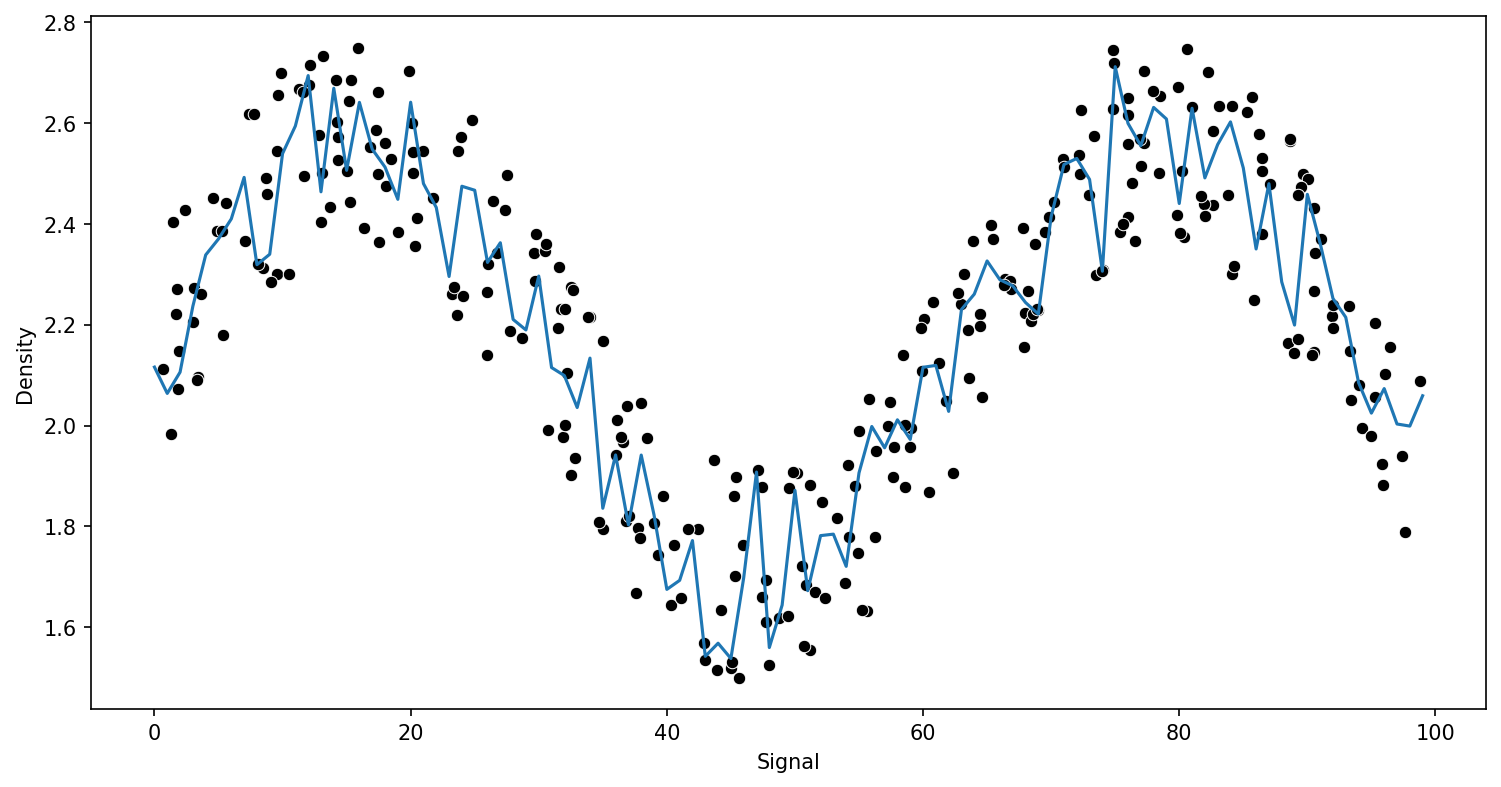

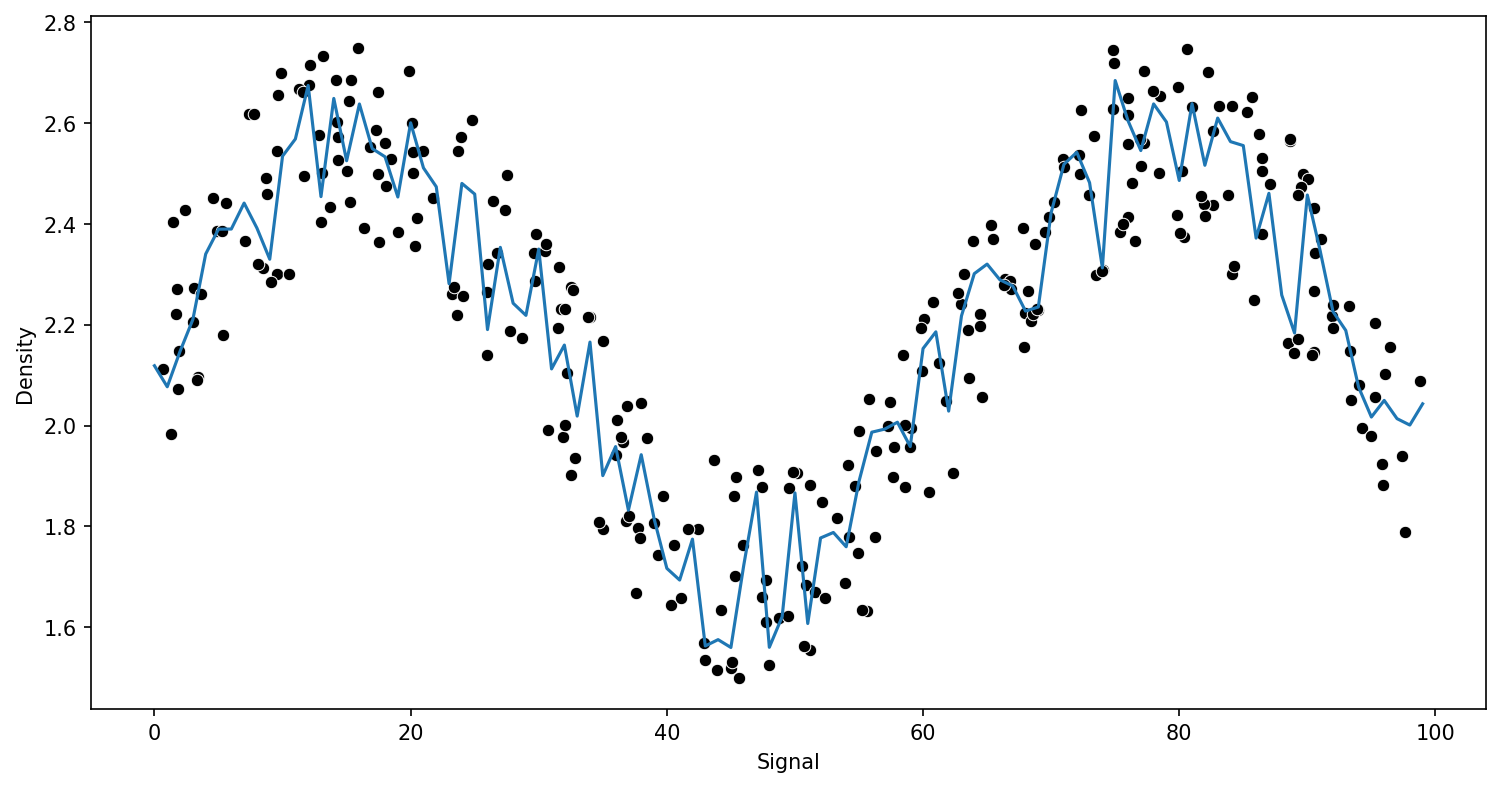

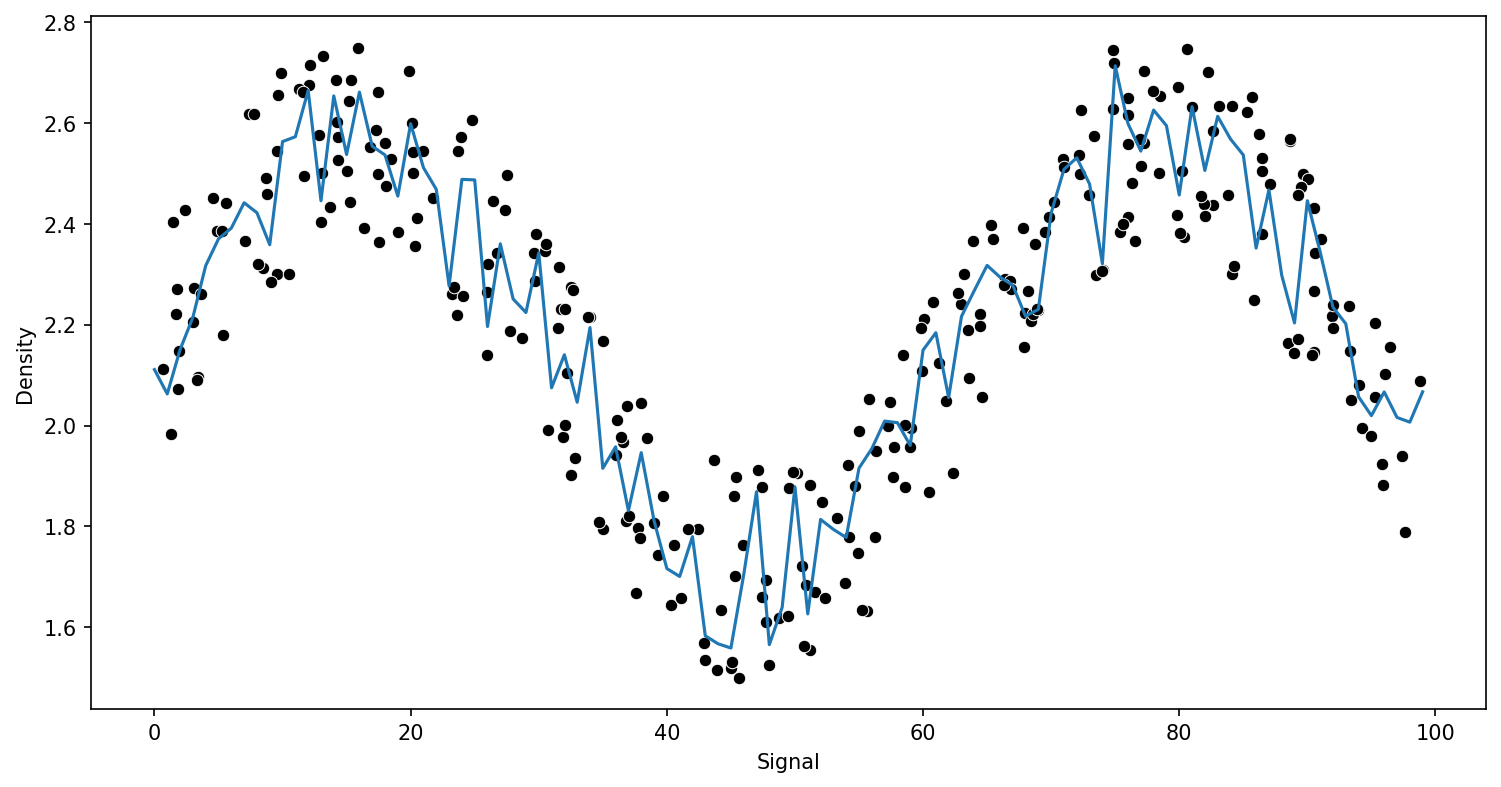

In [45]:
trees=[10,50,100]
for n in trees:
    model=RandomForestRegressor(n_estimators=n)
    run_model(model,X_train,X_test,y_train,y_test)

# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE:0.13294148649584667


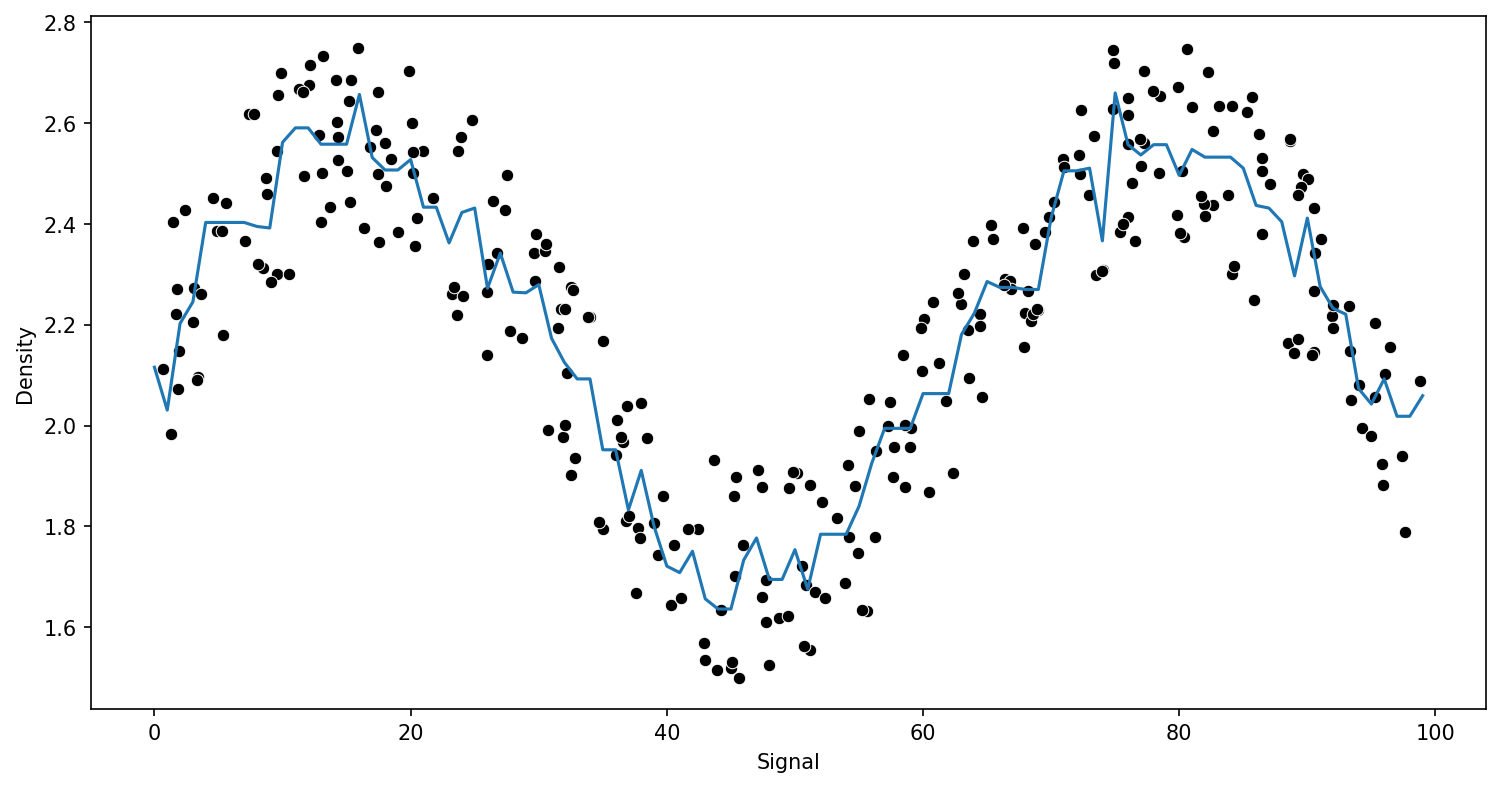

In [47]:
model=GradientBoostingRegressor()
run_model(model,X_train,X_test,y_train,y_test)

# Adaboost

In [48]:
from sklearn.ensemble import AdaBoostRegressor

RMSE:0.13294148649584667


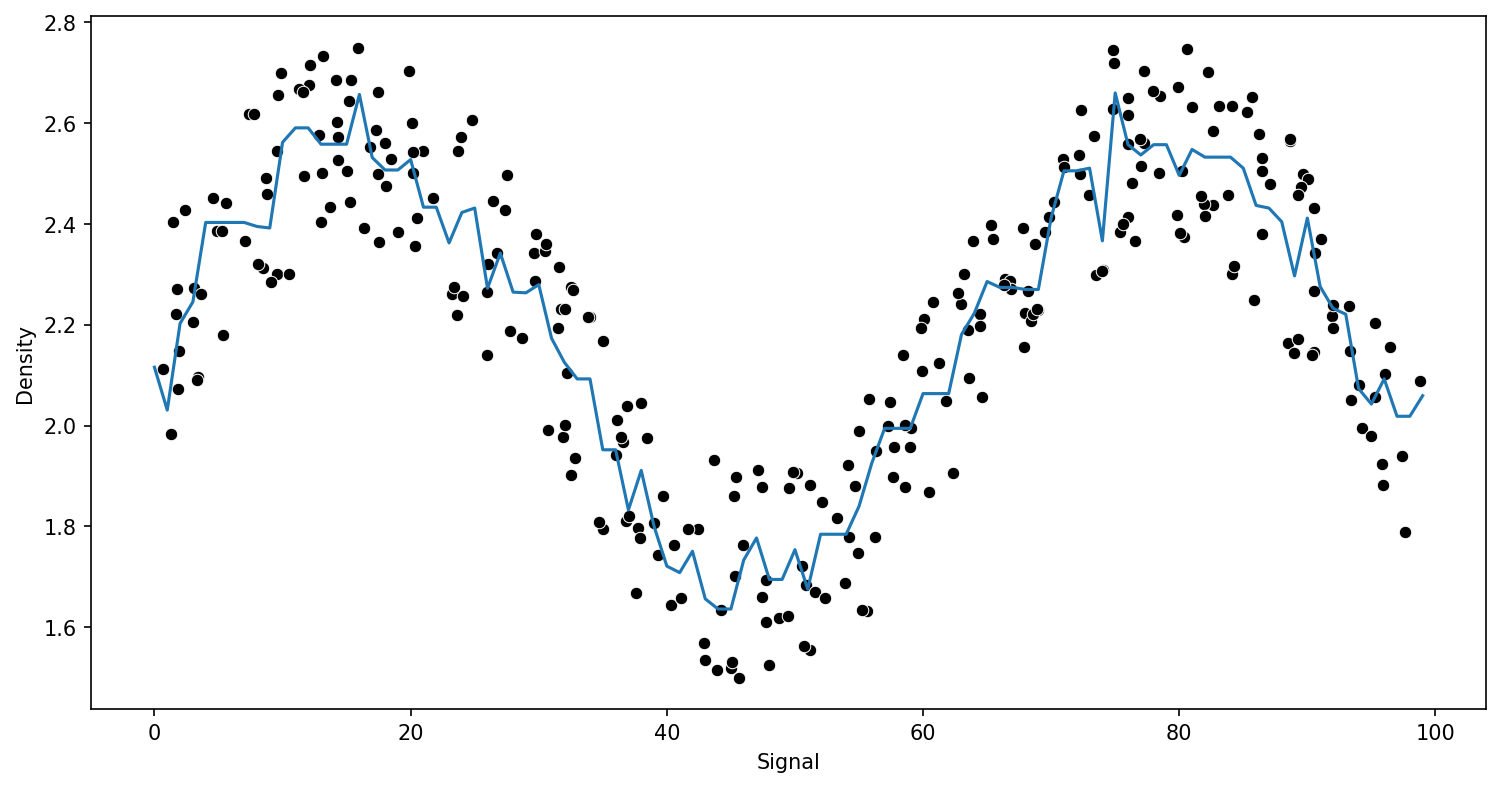

In [49]:
model=GradientBoostingRegressor()
run_model(model,X_train,X_test,y_train,y_test)